<a href="https://colab.research.google.com/github/Meralytics/Machine-Learning/blob/main/API_to_Pandas_Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual NASA API key
api_key = '4kfTpVhIY4lpzaDQw6GzjwK78Ptne9qEzcAK1ghX'

# Define the base URL for the APOD (Astronomy Picture of the Day) API
base_url = f'https://api.nasa.gov/planetary/apod?api_key={api_key}'

# Send a GET request to the API endpoint
response = requests.get(base_url)

In [ ]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

In [ ]:
data

{'copyright': '\nAntoine & Dalia Grelin\n',
 'date': '2023-09-26',
 'explanation': "Do you see the horse's head?   What you are seeing is not the famous Horsehead nebula toward Orion, but rather a fainter nebula that only takes on a familiar form with deeper imaging.  The main part of the here-imaged molecular cloud complex is  reflection nebula IC 4592.  Reflection nebulas are made up of very fine dust that normally appears dark but can look quite blue when reflecting the visible light of energetic nearby stars.  In this case, the source of much of the reflected light is a star at the eye of the horse.  That star is part of Nu Scorpii, one of the brighter star systems toward the constellation of the Scorpion (Scorpius).   A second reflection nebula dubbed IC 4601 is visible surrounding two stars above and to the right of the image center.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2309/BlueHorse_Grelin_9342.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'IC 4592:

In [ ]:
from IPython.display import Image, display

    # Display the APOD image
display(Image(url=data['url']))

In [ ]:
import pandas as pd

# Extract relevant information
title = data['title']
date = data['date']
explanation = data['explanation']
url = data['url']

# Create a DataFrame
apod_data = pd.DataFrame({
    "Attribute": ["Title", "Date", "Explanation", "Image URL"],
    "Value": [title, date, explanation, url]
})

# Set Pandas options to display full content of each cell
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
apod_data

,Attribute,Value
0,Title,IC 4592: The Blue Horsehead Reflection Nebula
1,Date,2023-09-26
2,Explanation,"Do you see the horse's head? What you are seeing is not the famous Horsehead nebula toward Orion, but rather a fainter nebula that only takes on a familiar form with deeper imaging. The main part of the here-imaged molecular cloud complex is reflection nebula IC 4592. Reflection nebulas are made up of very fine dust that normally appears dark but can look quite blue when reflecting the visible light of energetic nearby stars. In this case, the source of much of the reflected light is a star at the eye of the horse. That star is part of Nu Scorpii, one of the brighter star systems toward the constellation of the Scorpion (Scorpius). A second reflection nebula dubbed IC 4601 is visible surrounding two stars above and to the right of the image center."
3,Image URL,https://apod.nasa.gov/apod/image/2309/BlueHorse_Grelin_1080.jpg


In [ ]:
# Define the Near Earth Objects endpoint URL
neos_url = f'https://api.nasa.gov/neo/rest/v1/neo/browse?api_key={api_key}'

# Send a GET request to fetch NEOs data
response = requests.get(neos_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    neo_data = response.json()

    # Create a pandas DataFrame for asteroid data
    asteroid_data = []
     # Extract relevant information for each asteroid
    for asteroid in neo_data['near_earth_objects']:
        asteroid_id = asteroid['id']
        asteroid_name = asteroid['name']
        estimated_diameter_km = asteroid['estimated_diameter']['kilometers']['estimated_diameter_min']
        absolute_magnitude = asteroid['absolute_magnitude_h']
        relative_velocity_km_s = asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second']

        # Append the extracted data to the asteroid_data list
        asteroid_data.append({
            'Asteroid ID': asteroid_id,
            'Asteroid Name': asteroid_name,
            'Minimal Estimated Diameter (km)': estimated_diameter_km,
            'Absolute Magnitude': absolute_magnitude,
            'Relative Velocity (km/s)': relative_velocity_km_s
        })

    # Create a DataFrame from the extracted data
    NEO_df = pd.DataFrame(asteroid_data)

    # Export the DataFrame to a CSV file
    NEO_df.to_csv('asteroid_data.csv', index=False)

    # Print a success message
    print("DataFrame exported to asteroid_data.csv")
else:
    # Print an error message if the request failed
    print(f"Failed to fetch NEOs data. Status code: {response.status_code}")

DataFrame exported to asteroid_data.csv


In [ ]:
NEO_df.head()

,Asteroid ID,Asteroid Name,Minimal Estimated Diameter (km),Absolute Magnitude,Relative Velocity (km/s)
0,2000433,433 Eros (A898 PA),22.006703,10.41,5.5786191875
1,2000719,719 Albert (A911 TB),2.025606,15.59,3.4460290151
2,2000887,887 Alinda (A918 AA),4.451998,13.88,6.8047888406
3,2001036,1036 Ganymed (A924 UB),37.372743,9.26,6.3038666347
4,2001221,1221 Amor (1932 EA1),0.892391,17.37,13.2693801372


In [ ]:
NEO_df.describe()

,Minimal Estimated Diameter (km),Absolute Magnitude
count,20.000000,20.000000
mean,5.671985,14.649000
std,8.798627,2.159559
min,0.652462,9.260000
25%,1.837929,13.877500
50%,2.764467,14.915000
75%,4.457136,15.807500
max,37.372743,18.050000


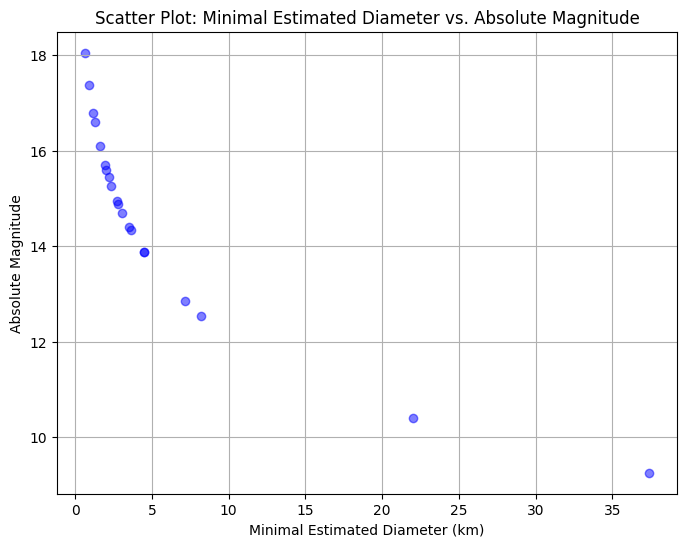

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    NEO_df['Minimal Estimated Diameter (km)'],
    NEO_df['Absolute Magnitude'],
    c='blue',
    alpha=0.5,
)
plt.xlabel('Minimal Estimated Diameter (km)')
plt.ylabel('Absolute Magnitude')
plt.title('Scatter Plot: Minimal Estimated Diameter vs. Absolute Magnitude')
plt.grid(True)
plt.show()

Interpreting the plot:

Smaller asteroids tend to have higher absolute magnitudes, it indicates that smaller asteroids are relatively brighter.